# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 20
TEAM-NAME:formula-ai
YOUR-ID: 2018122003
YOUR-NAME:Krishna Kumar Maram  

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)

def calc_x_pr(k):
    norm_gauss=np.exp(-((xo-k[1])**2)/(2*(k[2]**2)))
    x_pr=k[0]*norm_gauss
    return x_pr

def residual(k,yo):
    x_pr=calc_x_pr(k)
    r=x_pr-yo
    r=np.transpose(r)
    return r
def delta_r(r,k):
    jac_r=np.array([norm_gauss,
                k[0]*((xo-k[1])/k[2]**2)*norm_gauss,
                k[0]*((xo-k[1]**2)/k[2]**3)*norm_gauss])
    jac_r=np.transpose(jac_r)
    return jac_r
    

def delta_f(r,k):
    jac_f=np.dot(np.transpose(delta_r(r,k)),r)
    return jac_f  



In [3]:
nu_obs=50
xo=np.linspace(-25,25,nu_obs)

#ground truth values
a_gt=10
mu_gt=0
sd_gt=20
yo=a_gt*np.exp(-((xo-mu_gt)**2)/(2*(sd_gt**2)))

#initialization. 
k=np.array([10,13,19.2]) # Uncomment this Far away intiailization 

# k=np.array([10.2,0.65,19.8]) # Uncomment this for near by intialization 
#[a,mu,sd]

#objective function
norm_gauss=np.exp(-((xo-k[1])**2)/(2*(k[2]**2)))
x_pr=k[0]*norm_gauss
r=x_pr-yo
r=np.transpose(r)
r_mag=np.dot(np.transpose(r),r)
jac_f=delta_f(r,k)

In [4]:
#gradient descent function.
def plotPrediction(k,res_val,itr_count):
    
    fig,a=plt.subplots(1,2)
    
    fig.set_figheight(6)
    fig.set_figwidth(16)
    #ground truth
    a[0].plot(xo,yo)
    #prediction 
    calc_x_pr(k)
    a[0].plot(xo,x_pr)
    a[0].set(xlabel='observations', ylabel='Gaussian_function')
    a[0].set_title("predicted and ground truth")
    a[0].legend(["ground truth","predicted function"])
    
    #iter vs residual
    a[1].plot(itr_count,res_val)
    a[1].set(xlabel='Iteration', ylabel='Residual')
    a[1].set_title("Residual vs no.of iterations")
    plt.show()
    
def gradientDescent(k_p,learningRate,tolerance,maxIterations,noise):
    
        result=[]
        itr_count=[]
        
        alpha=learningRate #learning rate
        max_iterations=maxIterations
        tolerance=tolerance
        res_vec=residual(k_p,yo+noise)
        r_val=np.dot(np.transpose(res_vec),res_vec)
        del_f=delta_f(res_vec,k_p)
        
        itr=0
        while(itr<maxIterations and r_val>=tolerance):
            delta_k_p=np.dot(-alpha,del_f)
            k_p=k_p+delta_k_p
            res_vec=residual(k_p,yo+noise)
            r_val=np.dot(np.transpose(res_vec),res_vec)
            result.append(r_val)
            itr_count.append(itr)
            del_f=delta_f(res_vec,k)
            itr+=1
#         print(r_val,k_p,itr)
        return (k_p,result,itr_count)
    

    

# Gauss Newton method
def gaussNewton(k_p,learningRate,tolerance,maxIterations,noise):
    alpha=learningRate #learning rate
    max_iterations=maxIterations
    tolerance=tolerance
    res_vec=residual(k_p,yo+noise)
    r_val=np.dot(np.transpose(res_vec),res_vec)
    del_f=delta_f(res_vec,k_p)
    
    #for plotting
    result=[]
    itr_count=[]
    
    def direction():
        del_r=delta_r(res_vec,k)
        term1=np.linalg.inv(np.dot(np.transpose(del_r),del_r))
        term2=-np.dot(np.transpose(del_r),res_vec)
        term3=np.dot(term1,term2)
        return term3

    itr=0
    while(itr<maxIterations and r_val>=tolerance):
        k_p=k_p+alpha*direction()
        res_vec=residual(k_p,yo+noise)
        r_val=np.dot(np.transpose(res_vec),res_vec)
        result.append(r_val)
        itr_count.append(itr)
        itr+=1
#     print(r_val,k_p,itr)   
    return (k_p,result,itr_count)


# Levenberg Marquardt method
def LM(k_p,learningRate,tolerance,maxIterations,noise):
    
    alpha=learningRate #learning rate
    max_iterations=maxIterations
    tolerance=tolerance
    res_vec=residual(k_p,yo+noise)
    r_val=np.dot(np.transpose(res_vec),res_vec)
    del_f=delta_f(res_vec,k_p)
    
    #for plotting
    result=[]
    itr_count=[]
    
    def direction():
        del_r=delta_r(res_vec,k_p)
#         damp_thr=-2*np.transpose((np.dot(del_r,(yo-x_pr))))
        damp_thr=-2*np.transpose(np.dot(np.transpose(del_r),(yo-x_pr)))
        damp_thr=np.dot(np.transpose(damp_thr),damp_thr)
        des_thr=3500 #desicision threshold
#         print(damp_thr)
        if(damp_thr>=des_thr):
            lamda=1000
        if(damp_thr<des_thr):
            lamda=0.01
        term1=np.linalg.inv(np.dot(np.transpose(del_r),del_r)+lamda*np.identity((3)))
        term2=-np.dot(np.transpose(del_r),res_vec)
        term3=np.dot(term1,term2)
        return term3

    itr=0
    while(itr<maxIterations and r_val>=tolerance):
        k_p=k_p+alpha*direction()
        res_vec=residual(k_p,yo+noise)
        r_val=np.dot(np.transpose(res_vec),res_vec)
        result.append(r_val)
        itr_count.append(itr)
        itr+=1
#     print(r_val,k_p,itr)
    return (k_p,result,itr_count)


In [5]:
# noise_add=np.random.normal(k[1],k[2],50)   #change noise_add to add noise to the data
noise_add=0

outGd=gradientDescent(k,10**(-2),2*10**(-5),2000,noise_add)#argumetns are norm of residual, optimization parameters vector,
                                            #gradiet of f, learning rate, tolerance, maximum iterations.
kGd=outGd[0]
resGd=outGd[1]
itrGd=outGd[2]

outGn=gaussNewton(k,10**(-2),1*10**(-1),5000,noise_add)#argumetns are norm of residual, optimization parameters vector,
                                            #gradiet of f, learning rate, tolerance, maximum iterations.
kGn=outGn[0]
resGn=outGn[1]
itrGn=outGn[2]

outLm=LM(k,1,1*10**(-5),5000,noise_add)#argumetns are norm of residual, optimization parameters vector,
                                            #gradiet of f, learning rate, tolerance, maximum iterations.
kLM=outLm[0]
resLM=outLm[1]
itrLM=outLm[2]

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

For Gradient_descent:


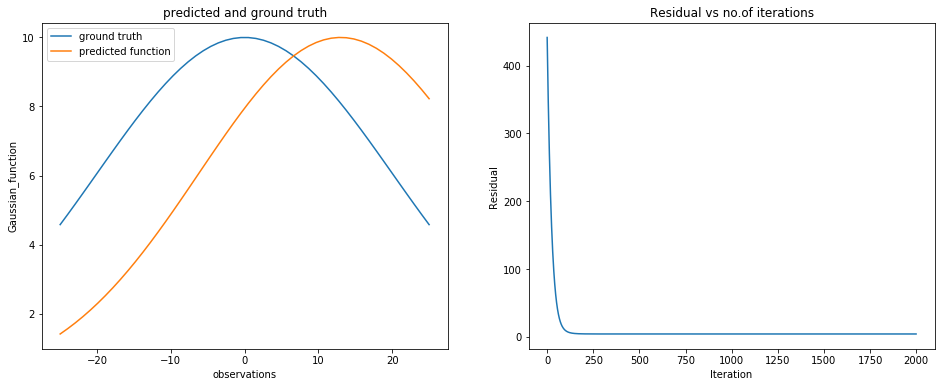

For Gauss Newton:


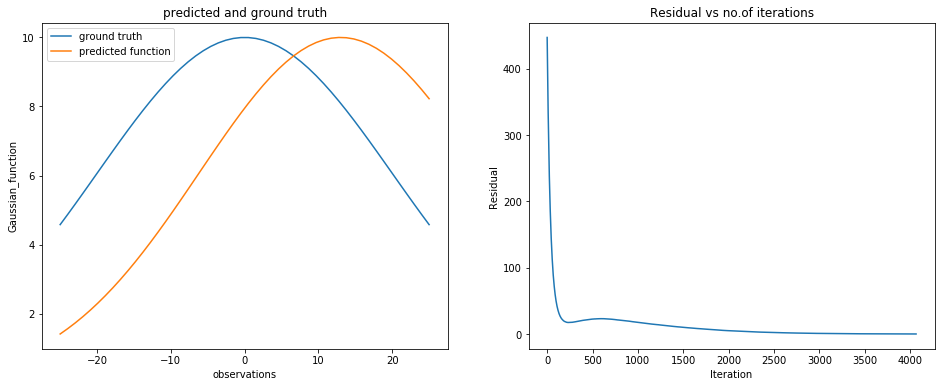

For Levenberg Marquardt:


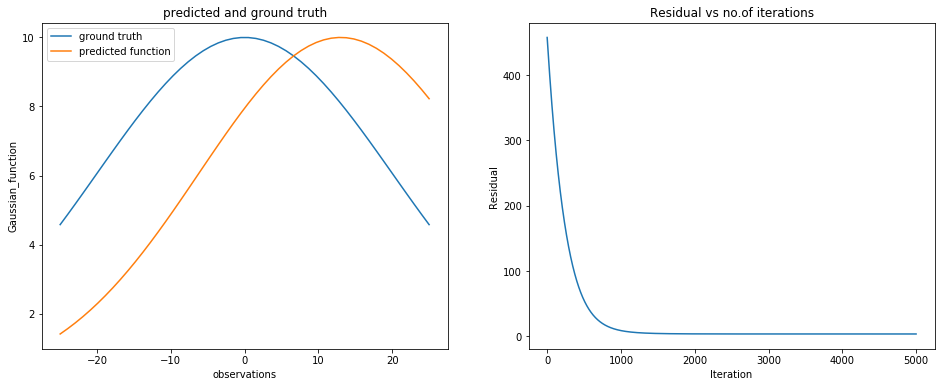

In [6]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1
print("For Gradient_descent:")
plotPrediction(kGd,resGd,itrGd)
print("For Gauss Newton:")
plotPrediction(kGn,resGn,itrGn)
print("For Levenberg Marquardt:")
plotPrediction(kLM,resLM,itrLM)



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Answers for Question 1

### Answer for 1.1
#### Results when using Gradient descent

| learning Rate | tolerance value| Maximum iterations  |optima                            |Noise|
| ------------- |:--------------:| --------------------:|-------------------------------------:|------------:|
| 0.01          |   10^-15       |      1000            |[10.25994463  0.45146165 18.48913727] | No|
| |
| 0.001         | 10^(-5)        |        150          | [10.25180817  0.50056212 18.4934879 ] |No|                                   
| |
| 0.0001        | 5.10^(0)       |        14641        |[10.22233375  0.68266347 18.50946865] |No       | 
| |
| 0.001         |  10^(-5)     |        2000         | [19.7495554  10.18330686 16.9044491 ] |Yes|                   

##### If Learning Rate is too high, prediction does not converge for lower tolerance value. Hence 1st observation is closer to second observation. 

##### Gradient descent does not work in the presence of noise as it is clear from 4th observation. 


### Answer for 1.2  with out noise  LR = 10e-2, Accuracy - 1-e5, Iteration - 1000. With far away intializatino. 

| Parameters    |   GD          |    GN   |   LM | 
| ------------- |:-------------:|:-------:|:-------:|
| A             | 10.4          | 0.4     |18.5     |
| |
| Mean          | 10.2          |  -1.6   |19.2     | 
| |
| SD            | 10.3          | 0.45    |19.1    |

#### For the same learning rate  if noise is added :-
| Parameters    |   GD          |    GN   |   LM | 
| ------------- |:-------------:|:-------:|:-------:|
| A             | 19.75          | 13.92  |18.5     |
| |
| Mean          |    10.18       |  0.18   |19.2     | 
| |
| SD            | 27.07          | 4.97    |15.019    |

#### As you can see None of the three methods is able to converge to the ground truth

### Aswer for 1.2 without Noise, with LR=1e-2, Checking which converges faster. When itialization is far away. 
| Parameters    |   GD          |    GN   |   LM | 
| ------------- |:-------------:|:-------:|:-------:|
|No.of iterations to converge | 145           |135      | 197  |
|                          |
|Optima | [10.22287141  0.67925709 18.50917273] | [ 9.54949219  3.30424316 23.69296875] | [10.24647737  0.4310408  18.55909285] |

#### GN is converging faster than GD and LM. LM is converging the slowest. 

### Answer for 1.2 without Noise, with LR=1e-2, Checking which converges faster. When initialization is near the ground truth. 

| Parameters    |   GD          |    GN   |   LM | 
| ------------- |:-------------:|:-------:|:-------:|
|No.of iterations to converge | 2000           |1104      | 256  |
|                          |
|Optima | [1.00409616e+01 3.37621922e-03 1.97672947e+01]| [ 9.95082580e+00 -2.45838165e-03  2.02837451e+01] | [1.00409623e+01 3.37627231e-03 1.97672910e+01] |

#### When the initialization is near the ground truth, LM method is the fastest. As it converges for lowest number of iterations. 

#### Observation - The GN technique can fall into the trap of stopping at local minima if learning rate or tolerance value is not choosen properly. For example I when we tried learning rate of 0.001 it got stalled at 1675th iteration. at optima [ 9.95082580e+00 -2.45838165e-03  2.02837451e+01].  While it was only a local minima. And the global minima was at [1.00000016e+01 2.08606945e-07 1.99999872e+01] which occurs near 1500 iteration. And it was also evident from the plot of the residual funciton where the there were a lot of local minima were observed. 
 
### Answer for 1.3  with noise  LR = 10e-7, Accuracy - 10-e5, Iteration - 50000
| Parameters    |   GD          |    GN   |   LM   |
| ------------- |:-------------:|:-------:|-------:|
| A             | 10.828        | 12      |18.5    |
| ------------- |:-------------:|:-------:|-------:|
| Mean          | 10.234        |  12     |19.2    |
| ------------- |:-------------:|:-------:|-------:|
| SD            | 10.124        | 12      |19.1    |

#### clearly none of the optimization methods are able to handle noise added to the data. 


# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [7]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
    
  P2 = np.dot(rot2, P)
  return X, P1, P2

In [8]:
def pairwise_dist(x,y):
    dists = -2*np.matmul(x,y.T)
    dists += np.sum(x**2,axis=1)[:,np.newaxis]
    dists += np.sum(y**2,axis=1)
    return np.sqrt(dists)

def nearest_neighbours(src,dest):
    all_dists = pairwise_dist(src,dest)
    indices = all_dists.argmin(axis=1)
    distances = all_dists[np.arange(all_dists.shape[0]), indices]
    return distances,indices

def best_fit(A,B):
    
    AA = A - A.mean(axis=0)
    BB = B - B.mean(axis=0)
    
    H = np.dot(AA.T,BB)
    U,S,Vt = np.linalg.svd(H)
    R = np.dot(Vt.T,U.T)
    if np.linalg.det(R)<0:
        Vt[-1,:] *= -1
        R = np.dot(Vt.T,U.T)
    t = B.mean(axis=0).T - np.dot(R,A.mean(axis=0).T)
    return R,t


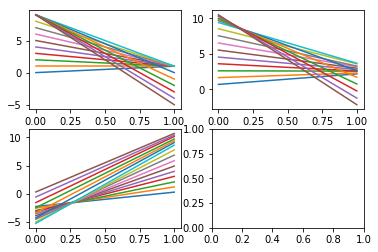

In [9]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X,P1,P2 = generate_data()
fig,axis=plt.subplots(2,2)
axis[0][0].plot(X)
axis[0][1].plot(P1)
axis[1][0].plot(P2)

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    prev_error=0
    num_iter = 15 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        distances, indices = nearest_neighbours(P.T,X.T)
        # TODO2.1: what's current error?
        mean_error = np.sum(distances) / distances.size
        if np.abs(prev_error-mean_error) < 0.01:    
            return P
        prev_error = mean_error
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X,P,P0,i,mean_error)
        # TODO2.3: Implement ICP to get R, t
        
        R,t = best_fit(P.T, X[:,indices].T)
        

        #Uncomment this: transforming my current point cloud towards initial point cloud
        P = np.dot(R,P) + t.reshape((2,1))
    return P
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

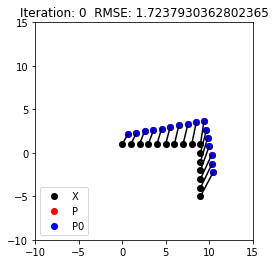

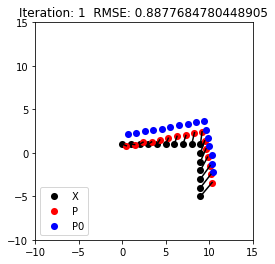

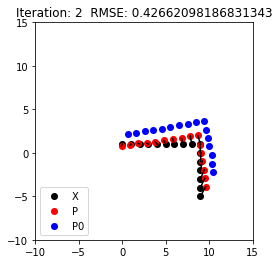

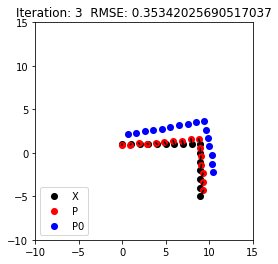

In [10]:
# Call ICP on P1 & P2

# ICP(X,P1) #Uncomment this
P1_new = ICP(X,P1) #Uncomment this

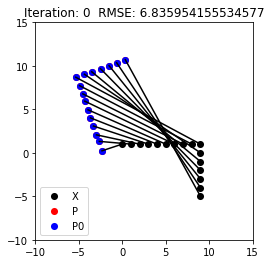

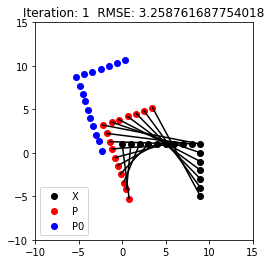

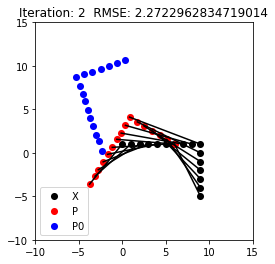

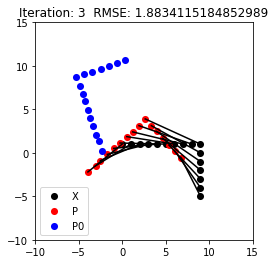

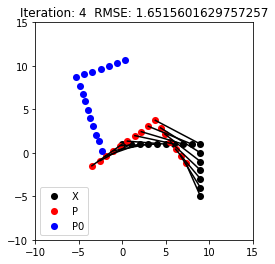

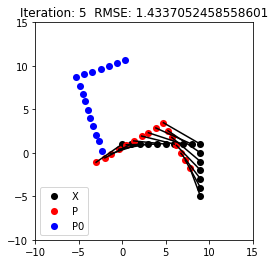

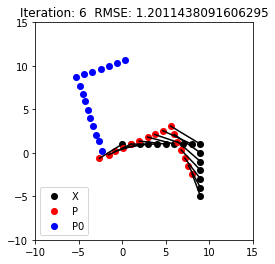

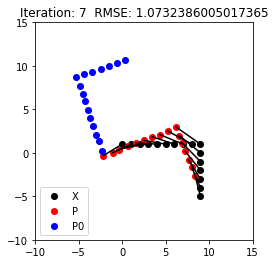

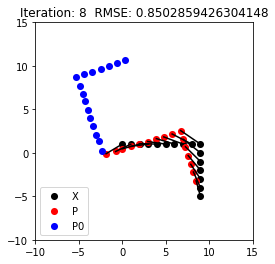

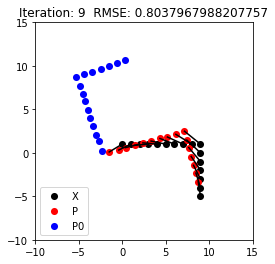

In [195]:
P2_new = ICP(X,P2)